# пример решения реальной задачи + бустинг

взята задача 12trip https://boosters.pro/championship/onetwotrip_challenge/overview

In [42]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# для встроенных картинок
%pylab inline
# отключить предупреждения
import warnings
warnings.filterwarnings('ignore')
# прогресс-бар
from tqdm import tqdm, tqdm_notebook
# много колонок
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
# для красоты
plt.style.use('seaborn-dark')
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


## данные

In [43]:
data_train = pd.read_csv('onetwotrip_challenge_train.csv')
print (data_train.shape)
data_train.sample(5)

(196056, 43)


,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
64703,64703,76b5e4faae27cdb1291b7f46e1dcb8368b1295028f6e09...,0,0.304348,7,7,1,1,0,1,1,0,0,17,19,152,0.879422,1,4,1,7,2,4,1,20,15,1,1,3,1,0,3,1,1,0,1,1,0,0,0,0,0,0
161881,161881,bafe414e44237c1cec7b9136ae1b98cbc16df9f19081d1...,9,-0.393794,9,9,4,0,0,2,1,0,0,17,12,3,-0.241109,1,1,1,2,3,3,1,2,15,1,2,5,3,0,3,1,1,0,0,0,0,0,0,0,0,0
38178,38178,887d7f89baf9b12ed6a8458d4e7986fde289f60ee9ff6f...,0,-0.471365,8,8,1,1,0,1,1,0,0,21,5,3,-0.381176,1,6,1,6,3,5,1,20,19,1,1,1,1,0,3,1,1,0,1,1,0,0,0,0,0,0
194737,194737,9d0e213bec9dd6fe3be5d40f6c94a78d15cb8c3062b474...,0,4.182916,11,2,1,0,16,2,0,0,1,14,32,3,3.680750,2,70,1,7,4,7,1,56,23,2,20,2,1,0,4,1,1,1,1,0,0,0,0,0,0,0
89692,89692,77314f819f3426c94a9801eb2fb58b100a84454f4dad2b...,150,-0.316223,4,4,2,0,0,1,1,0,0,18,4,3,-0.661308,2,4,1,1,3,5,2,28,8,1,1,5,3,1,2,1,1,0,1,1,0,0,0,0,0,0


In [31]:
# по каждому пользователю
data_train[data_train.userid==data_train.userid[3]]

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,1,0,0,19,12,3,-0.521242,2,22,1,3,3,4,1,46,12,2,18,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0
14000,14000,0392247b4b87674aba2c32bf2292b105771a6a376871be...,283,-0.471365,7,8,2,0,0,1,1,0,0,19,3,3,-0.381176,1,20,1,6,3,5,2,51,1,1,1,1,1,0,3,1,1,1,1,1,0,0,0,0,0,0
24832,24832,0392247b4b87674aba2c32bf2292b105771a6a376871be...,12,-0.393794,8,9,3,0,0,1,1,0,1,10,19,63,-0.381176,1,38,1,4,3,7,2,1,20,1,1,5,3,0,3,1,1,0,1,1,0,0,0,0,0,1


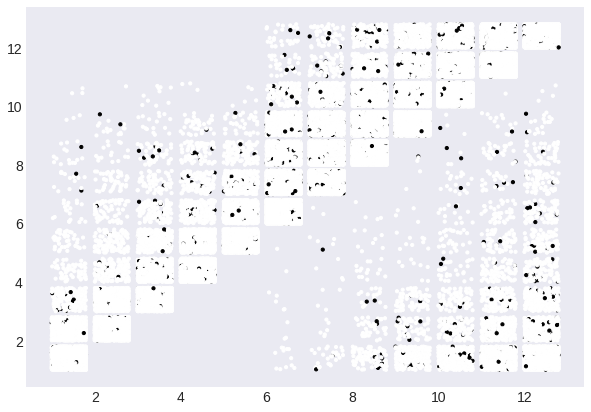

In [12]:
f1 = data_train.field2.values
f2 = data_train.field3.values # (data1.field3.values - data1.month1.values) % 12 + data1.month1.values
e1 = np.random.rand(len(f1)) * 0.8
e2 = np.random.rand(len(f2)) * 0.8

plt.figure(figsize=(10, 7))
plt.scatter(f1+e1, f2+e2, 10, data_train.goal1.values)

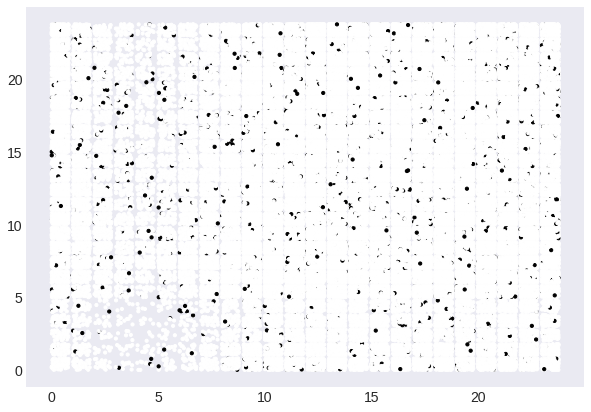

In [13]:
f1 = data_train.field11.values
f2 = data_train.field23.values # (data1.field3.values - data1.month1.values) % 12 + data1.month1.values
e1 = np.random.rand(len(f1)) * 0.8
e2 = np.random.rand(len(f2)) * 0.8

plt.figure(figsize=(10, 7))
plt.scatter(f1+e1, f2+e2, 10, data_train.goal1.values)

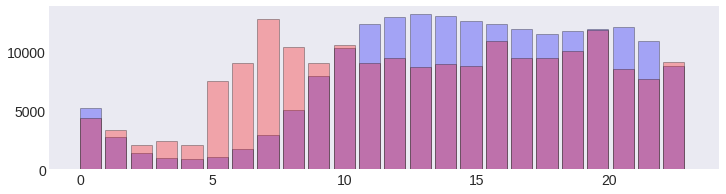

In [24]:
plt.figure(figsize=(12, 3))
plt.hist(data_train.field11.values, bins=24, width=0.8, color='b', alpha=0.3, edgecolor='k');
plt.hist(data_train.field23.values, bins=24, width=0.8, color='r', alpha=0.3, edgecolor='k');

## Результат анализа

In [44]:
data_train.rename(columns={'field4': 'n_inuser',
                   'field11': 'hour',
                   'field2': 'month1',
                   'field3': 'month2',
                   'field18': 'dayofweek1', # ?оформления
                   'field20': 'dayofweek2', # ?вылета
                   'field5': 'bin1',
                   'field7': 'bin2',
                   'field8': 'bin3',
                   'field10': 'bin4',
                   'field21': 'year1', # год
                   'field1': 'price_all',
                   'field14': 'price_1',
                   'field15': 'n_all',
                   'field24': 'n_adults',
                   'field23': 'hour2', # ?
                   'field28': 'n_ch2-6',                           
                   'field9': 'n_ch1',
                   'field0': 'fromlast', # ? дней с предыдущего заказа
                   'field16': 'tofly', # дней до вылета
                   'field29': 'quart' # номер квартала
                  }, inplace=True);

data_train.sample(5)

,orderid,userid,fromlast,price_all,month1,month2,n_inuser,bin1,field6,bin2,bin3,n_ch1,bin4,hour,field12,field13,price_1,n_all,tofly,field17,dayofweek1,field19,dayofweek2,year1,field22,hour2,n_adults,field25,field26,field27,n_ch2-6,quart,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
165210,165210,049c827d20c20f5bdca5df7aa5df40563da637611a957d...,0,-0.393794,7,9,1,1,0,1,1,0,0,21,5,4,-0.241109,1,86,1,2,3,4,1,5,14,1,1,2,1,0,3,1,1,0,1,1,0,0,0,0,0,0
93256,93256,50255c47f5fac3df19856d92526c4d4589530946d67783...,0,1.157633,7,8,1,1,10,1,1,0,0,14,4,3,-0.521242,6,17,1,1,1,4,1,19,15,4,1,2,1,2,3,1,1,0,1,1,0,0,0,0,0,0
146095,146095,fed8e63a5b75117533379b3c262769a43013f24772e264...,21,0.149205,11,11,2,0,2,1,1,0,0,21,12,18,-0.521242,4,1,1,5,2,6,1,1,7,4,1,12,3,0,4,1,1,0,1,1,0,0,0,0,0,0
33623,33623,9721174edc890f60fbaaf90f4ff90ec48e1f7b1940612b...,60,-0.548937,11,11,3,0,0,1,1,0,1,21,4,20,-0.661308,1,7,1,1,1,1,1,20,12,1,1,6,4,0,4,1,1,0,1,1,0,0,0,0,0,0
9257,9257,25164a0416ee6df54e94087d36843451e76f9900071c44...,34,-0.704079,2,3,6,0,3,1,0,0,0,8,1,24,-0.801375,1,12,1,7,3,5,2,12,16,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0


In [45]:
data_train['price_all'] = np.round (data_train['price_all']  / 0.077571 + 11.0765905).astype(int)
data_train['price_1'] = np.round (data_train['price_1']  / 0.14006639 + 7.72139269).astype(int)

# число билетов
data_train['max_n_inuser'] = data_train['userid'].map(data_train.groupby('userid')['n_inuser'].max())

# старая версия месяца и правильная
data_train['month2_old']  = data_train.month2.values
data_train['delta_m']  = (data_train['month1'] - data_train['month2']) % 12
data_train['month2'] = data_train.delta_m.values + data_train.month1.values

data_train['delta_dw'] = (data_train.dayofweek2 - data_train.dayofweek1) % 7
data_train['delta_dw2'] = data_train.tofly  % 7
data_train['delta_trouble'] =  data_train.delta_dw - data_train.delta_dw2

# выгода цены
data_train['price_div'] = data_train['price_all'] / (data_train['price_1'] * data_train['n_all'])

data_train['p_inuser'] = data_train['n_inuser'].values - 1
data_train['p_inuser'] = data_train['p_inuser'] / (data_train['max_n_inuser'] - 0.999)

# надо сейчас статистики признаков!!!
# data_train['agg_price_1_mean']  = data_train.userid.map(data_train.groupby('userid')['price_1'].mean())

del data_train['quart'] # производная от month1

# 'bin1' = I[n_inuser == 0] почти всегда
# признак 1-го заказа или промокода, 1 встречается при field4 = 1 и 8 + 15 (train + test) при field4 = 2

In [46]:
cols_mean = ['fromlast', 'price_all', 'bin4','field12',
             'field13', 'price_1', 'n_all', 'tofly',
             'field17', 'field19', 'field22', 'n_adults',
             'field25', 'field26', 'field27', 'n_ch2-6',
             'bin1', 'field6', 'bin2', 'bin3',
             'n_ch1', 'indicator_goal21', 'indicator_goal22',
             'indicator_goal23', 'indicator_goal24', 'indicator_goal25']

cols_diffmean = ['fromlast', 'price_all', 'field12',
             'field13', 'price_1', 'n_all', 'tofly',
             'field17', 'field19', 'field22', 'n_adults',
             'field25', 'field26', 'field27', 'n_ch2-6',
             'field6', 'n_ch1']

for name in cols_mean:
    data_train['mean_' + name] = data_train.userid.map(data_train.groupby('userid')[name].mean())
    

for name in cols_diffmean:
    data_train['diffmean_' + name] = data_train['mean_' + name] - data_train[name]

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_train.userid = le.fit_transform(data_train.userid)

data_train = data_train.sort_values(['userid', 'n_inuser'])
data_train.reset_index(inplace=True)

y1 = data_train.pop('goal1')
y21 = data_train.pop('goal21')
y22 = data_train.pop('goal22')
y23 = data_train.pop('goal23')
y24 = data_train.pop('goal24')
y25 = data_train.pop('goal25')

In [48]:
del data_train['index']

In [8]:
cols_diff = ['fromlast',  'price_all',  'bin4',  'hour',  'field12',  'field13',  'price_1',
 'n_all',  'tofly',  'field17',  'dayofweek1', 'field19', 'month1', 'dayofweek2',
 'year1', 'field22', 'hour2', 'n_adults', 'field25', 'field26', 'field27', 'n_ch2-6',
 'month2', 'bin1', 'field6', 'bin2', 'bin3', 'n_ch1', 'indicator_goal21',
 'indicator_goal22', 'indicator_goal23', 'indicator_goal24', 'indicator_goal25',
'month2_old', 'delta_m', 'delta_dw', 'delta_dw2', 'delta_trouble']


tmp = data_train.groupby('userid')[cols_diff]

In [9]:
# time...
# корректнее делать на объединённом датасете (train + test)

tmp1 = tmp.diff(1) #.fillna(-10.01)
tmp1.columns = ['diff1' + name for name in tmp1.columns]
print (tmp1.shape)

tmp2 = tmp.diff(-1) # .fillna(-10.01)
tmp2.columns = ['diff2' + name for name in tmp2.columns]
print (tmp2.shape)

(196056, 38)
(196056, 38)


In [49]:
data = data_train
#data = pd.concat([data_train, tmp1, tmp2], axis=1)
print (data.shape)

(196056, 87)


In [11]:
data.head()

,orderid,userid,fromlast,price_all,month1,month2,n_inuser,bin1,field6,bin2,bin3,n_ch1,bin4,hour,field12,field13,price_1,n_all,tofly,field17,dayofweek1,field19,dayofweek2,year1,field22,hour2,n_adults,field25,field26,field27,n_ch2-6,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,max_n_inuser,month2_old,delta_m,delta_dw,delta_dw2,delta_trouble,price_div,p_inuser,mean_fromlast,mean_price_all,mean_bin4,mean_field12,mean_field13,mean_price_1,mean_n_all,mean_tofly,mean_field17,mean_field19,mean_field22,mean_n_adults,mean_field25,mean_field26,mean_field27,mean_n_ch2-6,mean_bin1,mean_field6,mean_bin2,mean_bin3,mean_n_ch1,mean_indicator_goal21,mean_indicator_goal22,mean_indicator_goal23,mean_indicator_goal24,mean_indicator_goal25,diffmean_fromlast,diffmean_price_all,diffmean_field12,diffmean_field13,diffmean_price_1,diffmean_n_all,diffmean_tofly,diffmean_field17,diffmean_field19,diffmean_field22,diffmean_n_adults,diffmean_field25,diffmean_field26,diffmean_field27,diffmean_n_ch2-6,diffmean_field6,diffmean_n_ch1,diff1fromlast,diff1price_all,diff1bin4,diff1hour,diff1field12,diff1field13,diff1price_1,diff1n_all,diff1tofly,diff1field17,diff1dayofweek1,diff1field19,diff1month1,diff1dayofweek2,diff1year1,diff1field22,diff1hour2,diff1n_adults,diff1field25,diff1field26,diff1field27,diff1n_ch2-6,diff1month2,diff1bin1,diff1field6,diff1bin2,diff1bin3,diff1n_ch1,diff1indicator_goal21,diff1indicator_goal22,diff1indicator_goal23,diff1indicator_goal24,diff1indicator_goal25,diff1month2_old,diff1delta_m,diff1delta_dw,diff1delta_dw2,diff1delta_trouble,diff2fromlast,diff2price_all,diff2bin4,diff2hour,diff2field12,diff2field13,diff2price_1,diff2n_all,diff2tofly,diff2field17,diff2dayofweek1,diff2field19,diff2month1,diff2dayofweek2,diff2year1,diff2field22,diff2hour2,diff2n_adults,diff2field25,diff2field26,diff2field27,diff2n_ch2-6,diff2month2,diff2bin1,diff2field6,diff2bin2,diff2bin3,diff2n_ch1,diff2indicator_goal21,diff2indicator_goal22,diff2indicator_goal23,diff2indicator_goal24,diff2indicator_goal25,diff2month2_old,diff2delta_m,diff2delta_dw,diff2delta_dw2,diff2delta_trouble
0,84402,0,0,2,6,6,1,1,0,1,1,0,0,18,5,1,2,1,1,1,5,3,6,1,1,15,1,1,2,1,0,1,1,0,0,0,1,6,0,1,1,0,1.0,0.000000,0.0,2.0,0.0,5.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,107720,1,0,4,6,6,1,1,0,1,1,0,0,17,19,3,4,1,2,1,5,3,7,1,51,1,1,1,5,3,0,1,1,1,0,1,2,6,0,2,2,0,1.0,0.000000,3.0,5.0,0.0,19.0,33.0,5.0,1.0,3.0,1.0,3.0,26.0,1.0,1.0,5.0,3.0,0.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.5,1.0,3.0,1.0,0.0,30.0,1.0,0.0,1.0,0.0,0.0,-25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,-2.0,0.0,2.0,0.0,-60.0,-2.0,0.0,-2.0,0.0,1.0,0.0,0.0,6.0,0.0,50.0,-12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-2.0,-2.0,0.0
2,96638,1,6,6,6,6,2,0,0,1,1,0,0,15,19,63,6,1,4,1,4,3,1,1,1,13,1,1,5,3,0,1,1,1,1,1,2,6,0,4,4,0,1.0,0.999001,3.0,5.0,0.0,19.0,33.0,5.0,1.0,3.0,1.0,3.0,26.0,1.0,1.0,5.0,3.0,0.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.5,1.0,-3.0,-1.0,0.0,-30.0,-1.0,0.0,-1.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,-2.0,0.0,60.0,2.0,0.0,2.0,0.0,-1.0,0.0,0.0,-6.0,0.0,-50.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39007,2,0,3,7,7,1,1,0,1,1,0,1,11,4,54,3,1,7,1,5,1,5,1,1,21,1,1,10,2,0,1,1,0,1,1,1,7,0,0,0,0,1.0

In [50]:
# f_index = data.pop('index')
f_userid = data.pop('userid')
f_orderid = data.pop('orderid')

In [51]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import roc_auc_score

n_exp = 10
groups = f_userid
gss = GroupShuffleSplit(n_splits=n_exp, train_size=.7, random_state=1) 

In [52]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

lgb.__version__, xgb.__version__, cb.__version__

('2.3.1', '0.90', '0.22')

In [53]:
y = y1
from scipy.stats import rankdata

In [22]:
%%time
# пример решения

models = [#lgb.LGBMClassifier(learning_rate=0.1, num_leaves=12, colsample_bytree=0.75, subsample=0.75, n_estimators=100, random_state=1, reg_alpha=0.4, reg_lambda=0.6)
          lgb.LGBMClassifier(learning_rate=0.1, num_leaves=12, colsample_bytree=0.45, subsample=0.75, n_estimators=100, random_state=1, reg_alpha=0.4, reg_lambda=0.6)
         ]


for model in models:
    q = []
    for train_idx, test_idx in tqdm_notebook(gss.split(data, y, groups), total = n_exp):
        a = 0.0
        for t in range(4):
            model.set_params(**{'random_state': t});
            model.fit(data.values[train_idx,:], y[train_idx])
            a += rankdata(model.predict_proba(data.values[test_idx,:])[:,1])
        q.append(roc_auc_score(y[test_idx], a))
    print (np.round(np.mean(q),5), np.round(np.std(q),5))


0.70731 0.00566
CPU times: user 6min 19s, sys: 16.5 s, total: 6min 35s
Wall time: 1min 59s


## быстрый перебор моделей

не все модели работают с пропусками - делаем filna

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# тут эти модели будут плохими
models = {'лог_регрессия': LogisticRegression(),
          'лин_svm': LinearSVC(),
          'SGD': SGDClassifier(),
          'knn': KNeighborsClassifier(),
          'RF': RandomForestClassifier(),
          'ETC': ExtraTreesClassifier(),
          'GBM': GradientBoostingClassifier()}

In [ ]:
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

#cv = ShuffleSplit(n_splits=5, test_size=0.5, train_size=None, random_state=1)
cv = StratifiedKFold(5)

for model_name in models:
    model = models[model_name]
    cvs = cross_val_score(model, data.fillna(-1), y, cv=cv, scoring='roc_auc') #, error_score=0.5)
    print (cvs)
    print (model_name, f"auc={np.round(np.mean(cvs), 3)}", f"std={np.round(np.std(cvs), 3)}")

[0.61457526 0.6084686  0.60582601 0.62598572 0.62266297]
лог_регрессия auc=0.616 std=0.008


In [56]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

models = {#'lgb': lgb.LGBMClassifier(),
          #'xgb': xgb.XGBClassifier(),
          'cb': cb.CatBoostClassifier(silent=True)
         }
#[0.67921008 0.68965577 0.68336505 0.68804121 0.6837856 ]
#lgb auc=0.685 std=0.004
#[0.6896114  0.68750228 0.68866101 0.68994817 0.68625757]
#xgb auc=0.688 std=0.001
#[0.6741762  0.67394078 0.66271525 0.6780975  0.66544224]
#cb auc=0.671 std=0.006

In [57]:
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

#cv = ShuffleSplit(n_splits=5, test_size=0.5, train_size=None, random_state=1)
cv = StratifiedKFold(5)

for model_name in models:
    model = models[model_name]
    cvs = cross_val_score(model, data, y, cv=cv, scoring='roc_auc') #, error_score=0.5)
    print (cvs)
    print (model_name, f"auc={np.round(np.mean(cvs), 3)}", f"std={np.round(np.std(cvs), 3)}")

[0.6741762  0.67394078 0.66271525 0.6780975  0.66544224]
cb auc=0.671 std=0.006


## анализ отдельных алгоритмов

In [25]:
params = {'objective': 'binary', 'learning_rate': 0.9, 'num_leaves': 4, 'n_estimators': 100}
tmp = lgb.cv(params, train_set=lgb.Dataset(data, y), metrics=['auc', 'binary_logloss', 'rmse'])

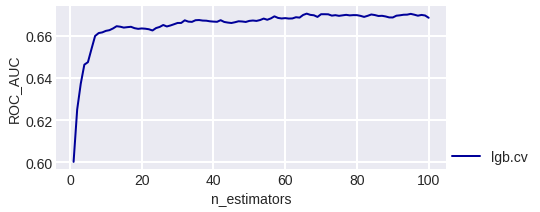

In [27]:
plt.figure(figsize=(7, 3))
plt.plot(range(1, 101), tmp['auc-mean'], lw=2, c='#000099', label='lgb.cv')
#plt.plot(pars, t2l.mean(axis=1), lw=2, c='#FFAAAA', label='sklearn.\nvalidation_curve')
plt.grid(lw=2)
#plt.xlim([0,105])
#plt.ylim([0.8, 0.9])
plt.xlabel('n_estimators')
plt.ylabel('ROC_AUC')
plt.legend(loc=(1,0))

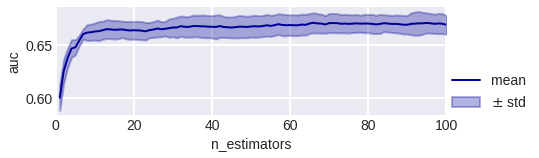

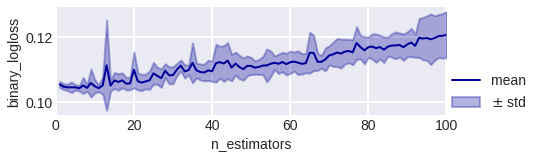

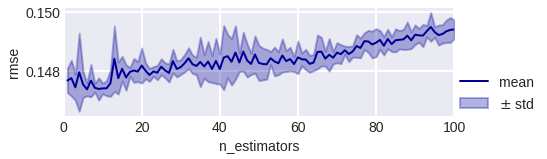

In [28]:
def plotPerf(tmp, q='auc'):
    plt.figure(figsize=(7, 2))
    plt.plot(range(1, 101), tmp[q+ '-mean'], lw=2, c='#000099', label='mean')
    plt.fill_between(range(1, 101), np.array(tmp[q+'-mean'])-np.array(tmp[q+'-stdv']),
                     np.array(tmp[q+'-mean'])+np.array(tmp[q+'-stdv']),
                     lw=2, color='#000099', alpha=0.3, label='$\pm$ std')
    plt.grid(lw=2)
    plt.xlabel('n_estimators')
    plt.ylabel(q)
    plt.xlim([0, 100])
    plt.legend(loc=(1,0))
    
plotPerf(tmp, 'auc')
plotPerf(tmp, 'binary_logloss')
plotPerf(tmp, 'rmse')

### ручной перебор параметров

In [30]:
q = []
q_std = []
for num_leaves in tqdm_notebook([2,4,8,16]):
    params = {'objective': 'binary',
              'learning_rate': 0.9,
              'num_leaves': num_leaves,
              'n_estimators': 100}
    tmp = lgb.cv(params, train_set=lgb.Dataset(data, y), metrics=['auc', 'binary_logloss', 'rmse'])
    q.append(np.max(tmp['auc-mean']))
    q_std.append(tmp['auc-stdv'][np.argmax(tmp['auc-mean'])])
    
q = np.array(q)
q_std = np.array(q_std)

In [31]:
q

array([0.6911423 , 0.67038508, 0.66962347, 0.663441  ])

In [60]:
# запуск с разными lr
# тут медленно!

q = []
q_std = []
s = []
lrs = np.linspace(0.1, 1.0, 10)
for learning_rate in lrs:
    params = {'objective': 'binary',
              'learning_rate': learning_rate,
              'num_leaves': 3,
              'n_estimators': 100}
    tmp = lgb.cv(params,
                 train_set=lgb.Dataset(data, y),
                 metrics=['auc', 'binary_logloss', 'rmse'])
    q.append(np.max(tmp['auc-mean']))
    q_std.append(tmp['auc-stdv'][np.argmax(tmp['auc-mean'])])
    s.append(tmp)
    print (learning_rate)
    
q = np.array(q)
q_std = np.array(q_std) 

0.1
0.2
0.30000000000000004
0.4
0.5


KeyboardInterrupt: 

In [64]:
lrs = np.linspace(0.1, 1.0, 10)

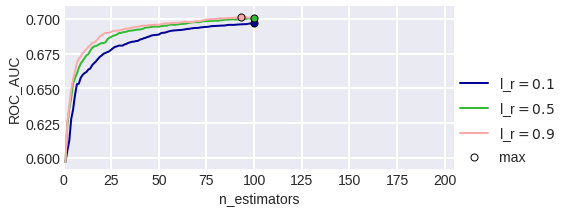

In [66]:
plt.figure(figsize=(7, 3))
g = s[0]['auc-mean']
plt.plot(range(1, 101), g, lw=2, c='#000099', label=f'l_r$=0.1$', zorder=1)
i = np.argmax(g)
plt.scatter([i+1], g[i], 50, c='#000099', edgecolors='black', zorder=2)

g = s[1]['auc-mean']
plt.plot(range(1, 101), g, lw=2, c='#33BB33', label='l_r$=0.5$', zorder=1)
i = np.argmax(g)
plt.scatter([i+1], g[i], 50, c='#33BB33', edgecolors='black', zorder=2)

g = s[2]['auc-mean']
plt.plot(range(1, 101), g, lw=2, c='#FFAAAA', label='l_r$=0.9$', zorder=1)
i = np.argmax(g)
plt.scatter([i+1], g[i], 50, c='#FFAAAA', edgecolors='black', zorder=2)

plt.scatter([],[],50, c='white', edgecolors='black', zorder=2, label='max')

plt.grid(lw=2)
plt.xlim([0,205])
#plt.ylim([0.8, 0.9])
plt.xlabel('n_estimators')
plt.ylabel('ROC_AUC')
plt.legend(loc=(1,0))

### автоматический перебор параметров

num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,

In [35]:
from sklearn.model_selection import RandomizedSearchCV


params = {'learning_rate': [0.05, 0.1, 0.2],
          'subsample': [0.5, 0.75, 1.0],
          'num_leaves': [2, 4, 8, 16],
          'reg_alpha': [0, 0.0001, 0.01],
          'reg_lambda': [0, 0.0001, 0.01],
         }

model = lgb.LGBMClassifier()
rs = RandomizedSearchCV(model, params, n_iter=10, scoring='roc_auc', n_jobs=-1, cv=5) 
rs.fit(data, y)

# поиск по группам сделан ниже в xgb!!!!, cv=gss, rs.fit(..., groups=groups)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                            subsample=1.0,
                                            subsample_for_bin=2000

In [36]:
rs.best_score_

0.7027665965558739

In [37]:
rs.best_params_

{'subsample': 1.0,
 'reg_lambda': 0.0001,
 'reg_alpha': 0.01,
 'num_leaves': 16,
 'learning_rate': 0.05}

In [39]:
# pd.DataFrame(rs.cv_results_)

In [44]:
import xgboost as xgb
#     max_depth=3,
#     learning_rate=1,
#     n_estimators=100,
#     verbosity=1,
#     silent=None,
#     objective='binary:logistic',
#     n_jobs=1,
#     nthread=None,
#     gamma=0,
#     min_child_weight=1,
#     max_delta_step=0,
#     subsample=0.8,
#     colsample_bytree=1,
#     colsample_bylevel=1,
#     colsample_bynode=0.8,
#     reg_alpha=0,
#     reg_lambda=1,
#     scale_pos_weight=1,
#     base_score=0.5,
#     random_state=0,
#     seed=None,
#     missing=None,

In [46]:
params = {'learning_rate': [0.05, 0.1, 0.2],
          'subsample': [0.5, 0.75, 1.0],
          'max_depth': [1, 2, 3, 4],
          'reg_alpha': [0, 0.0001, 0.01],
          'reg_lambda': [0, 0.0001, 0.01],
         }

model = xgb.XGBRFClassifier()

rs = RandomizedSearchCV(model, params, n_iter=1, scoring='roc_auc', n_jobs=-1, cv=gss) # одна итерация!

rs.fit(data, y, groups=groups)

RandomizedSearchCV(cv=GroupShuffleSplit(n_splits=10, random_state=1, test_size=None, train_size=0.7),
                   error_score=nan,
                   estimator=XGBRFClassifier(base_score=0.5,
                                             colsample_bylevel=1,
                                             colsample_bynode=0.8,
                                             colsample_bytree=1, gamma=0,
                                             learning_rate=1, max_delta_step=0,
                                             max_depth=3, min_child_weight=1,
                                             missing=None, n_estimators=100,
                                             n_jobs=1, nthread=None,
                                             objective='...
                                             seed=None, silent=None,
                                             subsample=0.8, verbosity=1),
                   iid='deprecated', n_iter=1, n_jobs=-1,
                   param_dist

In [47]:
rs.best_score_

0.624281957799133

# важности признаков

In [40]:
model = lgb.LGBMClassifier(learning_rate=0.05,
                           num_leaves=16,
                           # colsample_bytree=0.45,
                           subsample=1.0,
                           n_estimators=100,
                           random_state=1,
                           reg_alpha=0.01,
                           reg_lambda=0.0001)
model.fit(data.values, y)
model.feature_importances_

array([ 9, 20, 19,  6,  4,  0, 33,  5,  1,  0, 13, 13, 85,  9, 28,  2, 53,
        8,  9,  4,  5, 12, 17, 12,  1,  9,  2,  4,  1,  0,  4,  1,  6,  0,
       19,  2,  0,  6,  0,  0, 16, 14, 38, 24, 26, 18, 16, 40, 14, 22, 18,
       11, 21, 11, 14, 18,  8, 14, 15, 11,  4,  8,  0,  2,  3,  6,  6, 11,
       15, 13, 10,  7, 12,  4, 45,  1,  2, 14,  8,  4,  8, 20,  9, 12,  1,
       13,  9,  1,  9,  9,  9,  6,  0, 25,  8,  1,  3,  0,  2,  0,  8, 13,
        1,  1, 11,  5,  0,  3,  1,  3,  2,  0,  0,  0,  1,  0,  1,  0,  2,
        0,  4,  0,  1, 34,  9,  0, 18,  4, 25,  6,  5, 58,  0,  3,  3,  2,
        7,  4, 49, 11,  1,  3,  8, 18,  0, 10,  0, 12,  1,  0,  0,  0,  1,
        0,  1,  3, 29,  1,  2,  3,  1], dtype=int32)

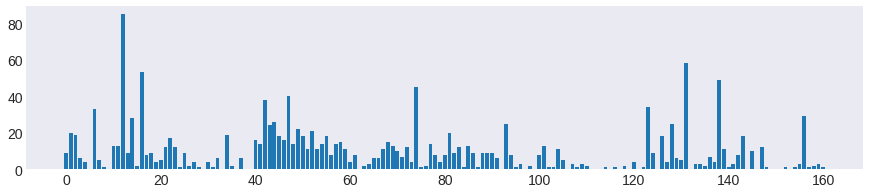

In [43]:
plt.figure(figsize=(15, 3))
plt.bar(np.arange(data.shape[1]), model.feature_importances_);

### ответы разных алгоритмов

In [50]:
from sklearn.model_selection import cross_val_predict


a_lgb = cross_val_predict(lgb.LGBMClassifier(n_estimators=1), data, y,
                          cv=5,
                          # groups=groups, cv=gss, тут несколько запусков - не подойдёт
                          n_jobs=None, verbose=0,
                          fit_params=None, pre_dispatch='2*n_jobs',
                          method='predict_proba')[:,1]

In [51]:

a_xgb = cross_val_predict(xgb.XGBClassifier(n_estimators=1), data, y,
                          cv = 5, #groups=groups, cv=gss,
                          n_jobs=None, verbose=0,
                          fit_params=None, pre_dispatch='2*n_jobs',
                          method='predict_proba')[:,1]

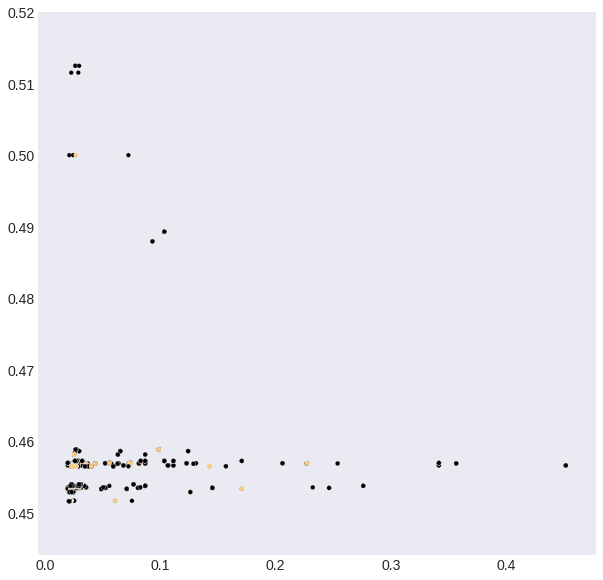

In [56]:
plt.figure(figsize=(10, 10))
plt.scatter(a_lgb, a_xgb, 20, y, cmap='copper', edgecolor='w', lw=0.2)

In [83]:
#a_log = cross_val_predict(LogisticRegression(), data, y,
#                          cv = 5, #groups=groups, cv=gss,
#                          n_jobs=None, verbose=0,
#                          fit_params=None, pre_dispatch='2*n_jobs',
#                          method='predict_proba')[:,1]

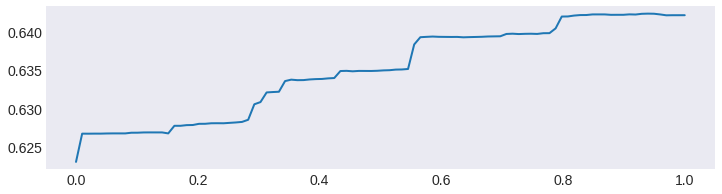

In [58]:
a1 = rankdata(a_lgb)
a2 = rankdata(a_xgb)

a = [roc_auc_score(y, alpha*a1 + (1-alpha)*a2) for alpha in np.linspace(0, 1, 100)]

plt.figure(figsize=(12, 3))
plt.plot(np.linspace(0, 1, 100), a, lw=2)